In [56]:
#importing libraries to be used 
# https://www.youtube.com/watch?v=QIUxPv5PJOY&t=387s
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [57]:
df = web.DataReader('AAPL', data_source= 'yahoo', start= '2012-01-01', end= '2021-05-01')

In [58]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


In [59]:
df.shape

(2347, 6)

Text(0, 0.5, 'Close Price ')

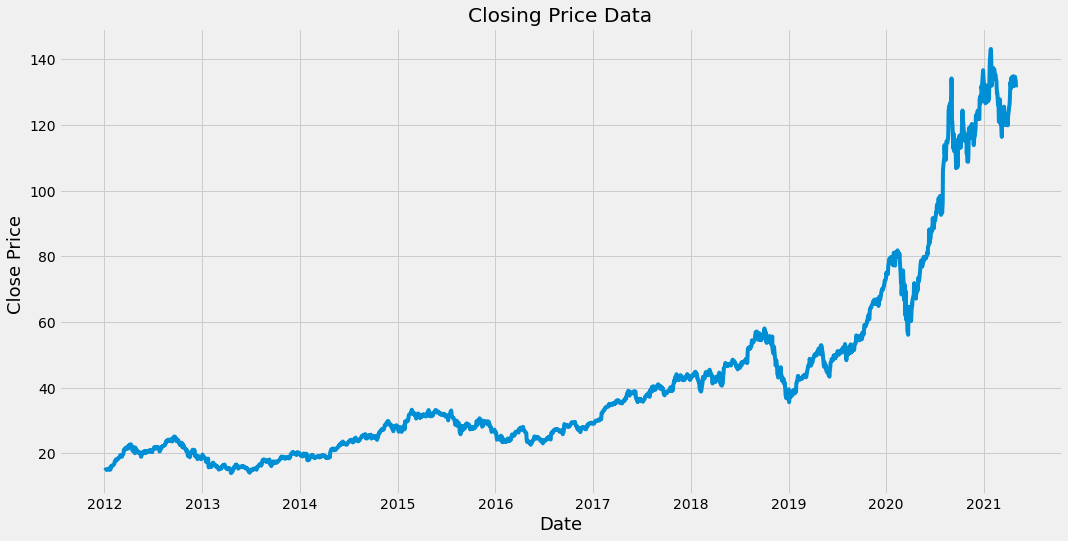

In [61]:
#visualize the closing price 
plt.figure(figsize=(16,8))
plt.title("Closing Price Data")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel("Close Price ", fontsize = 18)


In [62]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)

In [63]:
training_data_len

1878

In [64]:
#scaling data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [65]:
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.92585855],
       [0.92508459],
       [0.90945151]])

In [66]:
#Create the training dataset 
#Create the scaled training dataset 
train_data= scaled_data[0:training_data_len,:]
#splitting the data in to training and testing 
x_train = []
y_train =[]

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i,0]) 
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [67]:
#Convert the x_Train and y_train to numpy arrays
x_train,y_train = np.array(x_train) , np.array(y_train)

In [68]:
#reshaping of data set 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1818, 60, 1)

In [44]:
#Built a new model 
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#compile the model 
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [46]:
#training of model 
model.fit(x_train,y_train, batch_size=1,epochs=1)

1818/1818 [==============================] - 27s 15ms/step - loss: 2.6772e-04


In [69]:
#create the testing data set 
#create a new array containing scaled values from index (end of array)
test_data = scaled_data[training_data_len-60:,:]
#create the datasets x_test and y_test 
x_test =[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [70]:
#convert the data into scaled and numpy array 
x_test = np.array(x_test)
#Reshaping of the data 
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [77]:
#Getting model predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [78]:
#Get the RMSE (root mean sqaured error) 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.734966082867783

<ipython-input-82-4fb397f42e97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


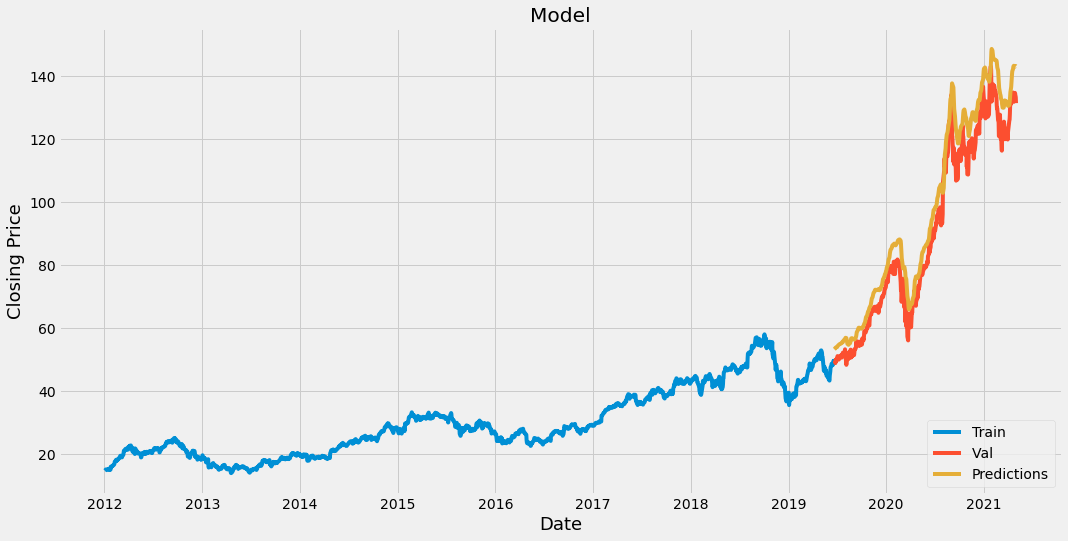

In [82]:
#plot data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Val ', 'Predictions'] , loc = 'lower right')

In [83]:
#show the valid and predicted prices 
valid

,Close,Predictions
Date,,
2019-06-21,49.695000,53.287800
2019-06-24,49.645000,53.535393
2019-06-25,48.892502,53.719666
2019-06-26,49.950001,53.759747
2019-06-27,49.935001,53.839096
...,...,...
2021-04-26,134.720001,143.076614
2021-04-27,134.389999,143.164246
2021-04-28,133.580002,143.260773


In [87]:
#Try and get the new updated price prediction 
apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start = '2012-01-01', end = '2021-05-02' )
#create a new df 
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing values and covert the dataframe to an array 
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#convert x_test dataset to np array 
X_test=np.array(X_test)
#Reshape 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price 
pred_price = model.predict(X_test)
#Undo scaling 
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[142.82901]], dtype=float32)

In [89]:
apple_quote2 = web.DataReader('AAPL', data_source= 'yahoo', start = '2021-05-03', end = '2021-05-03' )
apple_quote2['Close']

Date
2021-05-03    132.539993
Name: Close, dtype: float64